In [1]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END

In [9]:
class AgentState(TypedDict):
    number1: int
    number2: int
    operation1: str
    finalResult1: int
    
    number3: int
    number4: int
    operation2: str
    finalResult2: int

In [10]:
def adder_node1(state: AgentState)->AgentState:
    """This node adds two numbers"""

    state['finalResult1'] = state['number1'] + state['number2']

    return state

def subtractor_node1(state: AgentState) -> AgentState:
    """This node suntracts two numbers"""

    state['finalResult1'] = state['number1'] - state['number2']

    return state

def adder_node2(state: AgentState)->AgentState:
    """This node adds two numbers"""

    state['finalResult2'] = state['number3'] + state['number4']

    return state

def subtractor_node2(state: AgentState) -> AgentState:
    """This node suntracts two numbers"""

    state['finalResult2'] = state['number3'] - state['number4']

    return state

def decision_node1(state: AgentState)->AgentState:
    """This acts as a router for operation1"""
    
    if state['operation1']=='+':
        return "adder_edge_1"
    if state['operation1']=='-':
        return "subtractor_edge_1"
    
def decision_node2(state: AgentState)->AgentState:
    """This acts as a router for operation2"""
    
    if state['operation2']=='+':
        return "adder_edge_2"
    if state['operation2']=='-':
        return "subtractor_edge_2"

In [11]:
graph = StateGraph(AgentState)

graph.add_node("adder_node1", adder_node1)

graph.add_node("adder_node2",adder_node2)

graph.add_node("subtractor_node1", subtractor_node1)

graph.add_node("subtractor_node2",subtractor_node2)

graph.add_node("router1", lambda state:state)

graph.add_node("router2", lambda state: state)

graph.add_conditional_edges(
    "router1",
    decision_node1,
    {
        "adder_edge_1": "adder_node1",
        "subtractor_edge_1": "subtractor_node1"
    }
)

graph.add_conditional_edges(
    "router2",
    decision_node2,
    {
        "adder_edge_2": "adder_node2",
        "subtractor_edge_2": "subtractor_node2"
    }
)

graph.add_edge(START, "router1")
graph.add_edge("adder_node1","router2")
graph.add_edge("subtractor_node1","router2")
graph.add_edge("adder_node2",END)
graph.add_edge("subtractor_node2",END)

app = graph.compile()


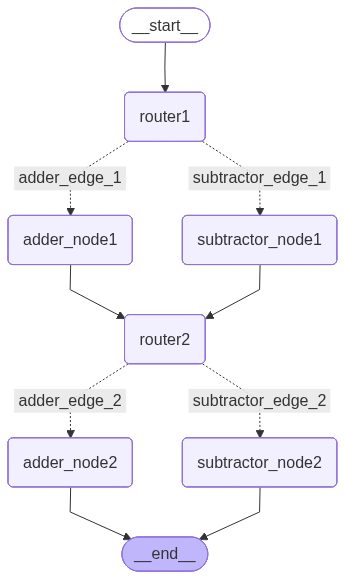

In [12]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [13]:
initial_state = AgentState(number1=10,number2=5,operation1='-',number3=11,number4=9,operation2='+')
print(app.invoke(initial_state))

{'number1': 10, 'number2': 5, 'operation1': '-', 'finalResult1': 5, 'number3': 11, 'number4': 9, 'operation2': '+', 'finalResult2': 20}
